Spotify 2023 songs: Predective modelling 

In [1]:
import kagglehub
import pandas as pd
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

c:\Users\tdawa\OneDrive\Desktop\Python\codes\Spotify Project\.venvSong\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")
print("Path to dataset files:", path)

100%|██████████| 47.1k/47.1k [00:00<00:00, 2.86MB/s]

Extracting files...
Path to dataset files: C:\Users\tdawa\.cache\kagglehub\datasets\nelgiriyewithana\top-spotify-songs-2023\versions\1


In [3]:
df = pd.read_csv(r"C:\Users\tdawa\.cache\kagglehub\datasets\nelgiriyewithana\top-spotify-songs-2023\versions\1\spotify-2023.csv", encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#Checking basic information (data types and null values)
df.info()
#summary of statistics for numerical columns
df.describe().round(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0
mean,1.6,2018.2,6.0,13.9,5200.1,12.0,67.8,51.9,2.7,122.5,67.0,51.4,64.3,27.1,1.6,18.2,10.1
std,0.9,11.1,3.6,9.2,7897.6,19.6,86.4,50.6,6.0,28.1,14.6,23.5,16.6,26.0,8.4,13.7,9.9
min,1.0,1930.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,1.0,2020.0,3.0,6.0,875.0,0.0,13.0,7.0,0.0,100.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,1.0,2022.0,6.0,13.0,2224.0,3.0,34.0,38.0,0.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5542.0,16.0,88.0,87.0,2.0,140.0,78.0,70.0,77.0,43.0,0.0,24.0,11.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,672.0,275.0,58.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


In [5]:
#auto adjusting the Dtype if required
df = df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    object


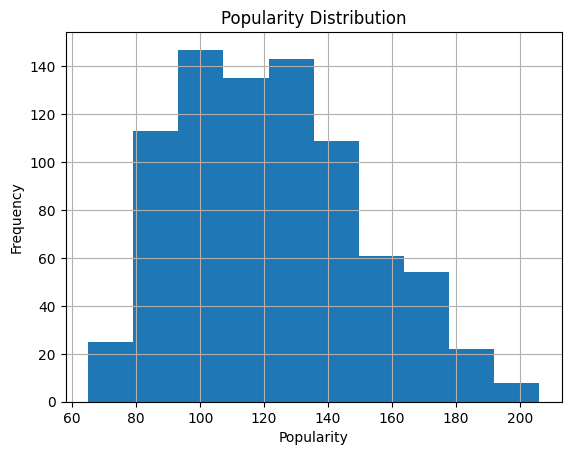

In [8]:
#Histogram of a numerical column 
df['bpm'].hist()
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

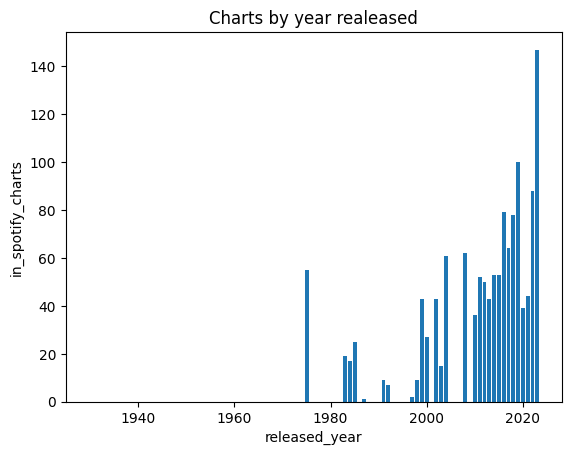

In [9]:
#Bar plot for a categorical column 
x = df['released_year'] #.value_counts()
y = df['in_spotify_charts']
plt.title('Charts by year realeased')
plt.xlabel('released_year')
plt.ylabel('in_spotify_charts')
plt.bar(x,y,align='center',width=0.8)

plt.show()

Min:  0 Max:  147
Min:  14 Max:  97


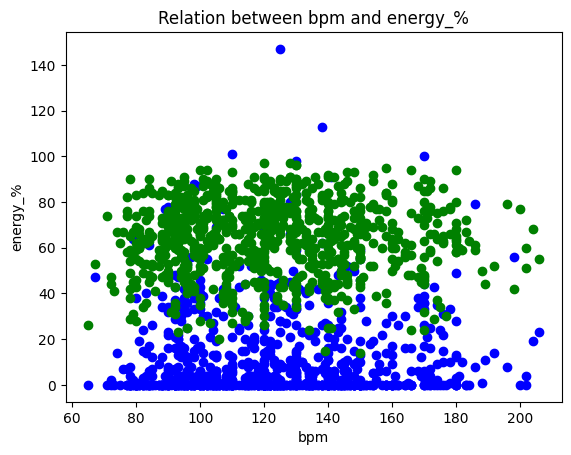

In [10]:
#Plotting two different scatter plots in the same graph

#plot 1
x = df['bpm']
y = df['in_spotify_charts']

print("Min: ",min(y), "Max: ",max(y))
plt.scatter(x, y, color='blue')
plt.title('Relation between bpm and in_spotify_charts')
plt.xlabel('bpm')
plt.ylabel('in_spotify_charts')

#plot 2
x = df['bpm']
y = df['energy_%']

print("Min: ",min(y), "Max: ",max(y))
plt.scatter(x, y, color= 'green')
plt.title('Relation between bpm and energy_%')
plt.xlabel('bpm')
plt.ylabel('energy_%')

plt.show()

In [12]:
#Correlation matrix

correlation_matrix = df['bpm','energy_%'].corr()

#Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Need to clean the data and convert it into integers or floats first, 
# then we can compare which features have the best correleation to each other.

KeyError: ('bpm', 'energy_%')

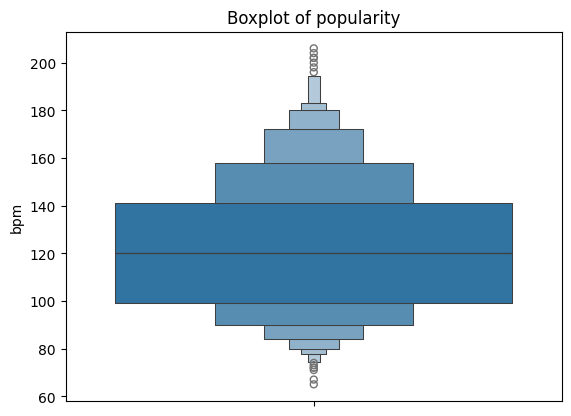

In [13]:
#identify outliers using boxplots
sns.boxenplot(df['bpm'])
plt.title('Boxplot of popularity')
plt.show()

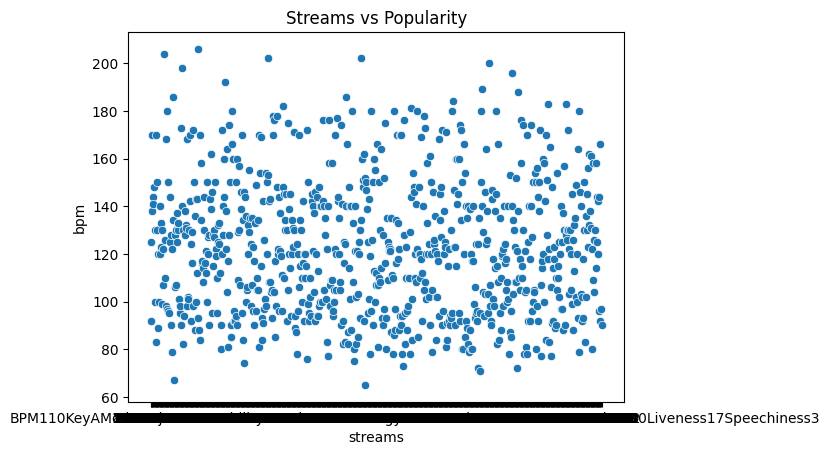

In [14]:
#Scatter plot to explore replationships

sns.scatterplot(data=df[['streams','bpm']], x='streams', y='bpm')
plt.title('Streams vs Popularity')
plt.show()

In [15]:
#Data preparation for ML
#one hot encoding
df = pd.get_dummies(df, columns=['mode'], drop_first=True)
print(df[['mode']])

KeyError: "None of [Index(['mode'], dtype='object')] are in the [columns]"

In [16]:
scaler = StandardScaler()
numerical_columns = ['streams', 'duration_ms', 'tempo']  # Example columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

KeyError: "['duration_ms', 'tempo'] not in index"

In [ ]:
# ML model

y = df['streams'] #Target variable

X = df[['bpm','energy_%']]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate R² score to evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

In [ ]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'MSE: {mse}, RMSE: {rmse}')

In [ ]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test,y_pred, alpha=0.3,color='red')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()